<a href="https://colab.research.google.com/github/gabriel-reis12/Preco-Pistao/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Project - Importing Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Estudo.xlsx')

In [ ]:
df.head(5)

,Código,Tiny\nPESO SERRADO,preço novo
0,1,0.337,53.38
1,1,0.337,66.33
2,1,0.337,61.42
3,2,0.310,53.43
4,2,0.310,44.33


In [ ]:
df = df.rename(columns={'Tiny\nPESO SERRADO': 'Peso'}) #Rename weight column (Peso).

In [ ]:
df = df.rename(columns={'preço novo': 'Preco'}) #Rename price column (Preco).

In [ ]:
df_limpo = df.dropna(subset=["Peso", "Preco"]) #Cleaning NaN

##Viewing Data

In [ ]:
import matplotlib.pyplot as plt

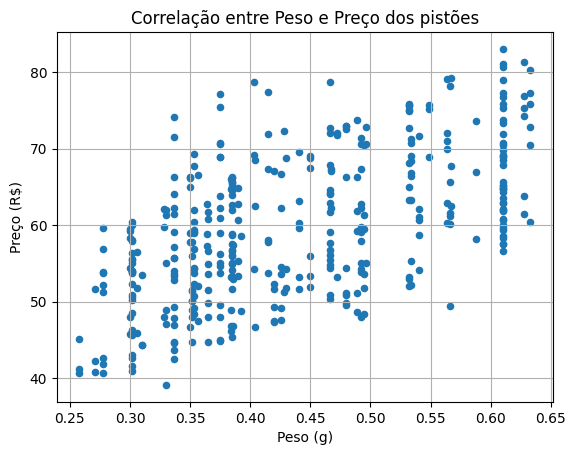

In [ ]:
df.plot(kind="scatter", x="Peso", y="Preco"); #Scatter plot to analyse outliers
plt.title("Correlação entre Peso e Preço dos pistões")
plt.xlabel("Peso (g)")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.show()

####Many outliers, I will use the RANSAC Regressor.

##Importing SkLearn

In [ ]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [ ]:
modelo_base = LinearRegression() #Linear Regression
modelo_ransac = RANSACRegressor(estimator=modelo_base) #Linear Regression cleaning outliers
x = df_limpo[["Peso"]] #Set column y as Peso (Weight).
y = df_limpo[["Preco"]] #Set column y as Preco (Price).

In [ ]:
modelo_ransac.fit(x,y) #Train the model using "fit"

RANSACRegressor(estimator=LinearRegression())

##Enter the value and receive the result.

In [ ]:
try:
    valor_peso = float(input("Digite o peso do pistão desejado: "))
    preco_previsto = modelo_ransac.predict([[valor_peso]])[0][0] #Value in Reais
    print(f"O preço do pistão em reais é: R$ {preco_previsto:.2f}")
except ValueError:
    print("Por favor, digite um número válido para o peso.")
